1) Delivery_time -> Predict delivery time using sorting time 

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
#EDA and DataVisualization Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Linear Regression Model Building Libraries
import statsmodels.formula.api as smf

#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting Figure Parameters
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [4]:
#Importing Dataset from this folder itself.
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
df.rename(columns={'Delivery Time' : 'Delivery'}, inplace=True)
df.rename(columns={'Sorting Time' : 'Sorting'}, inplace=True)

In [9]:
df.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
# Question is to predict Delivery time considering Sorting time.
# Therefore, Delivery time is our target column and rest all are independent columns.
# We have only 1 independent column. Therefore, we use Linear Regression in this case.

Doing Basic EDA and Understading Dataset through Graphs

In [11]:
df.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [12]:
df.shape

(21, 2)

In [13]:
# Checking for null values in the data
df.isna().sum()

Delivery    0
Sorting     0
dtype: int64

<AxesSubplot:>

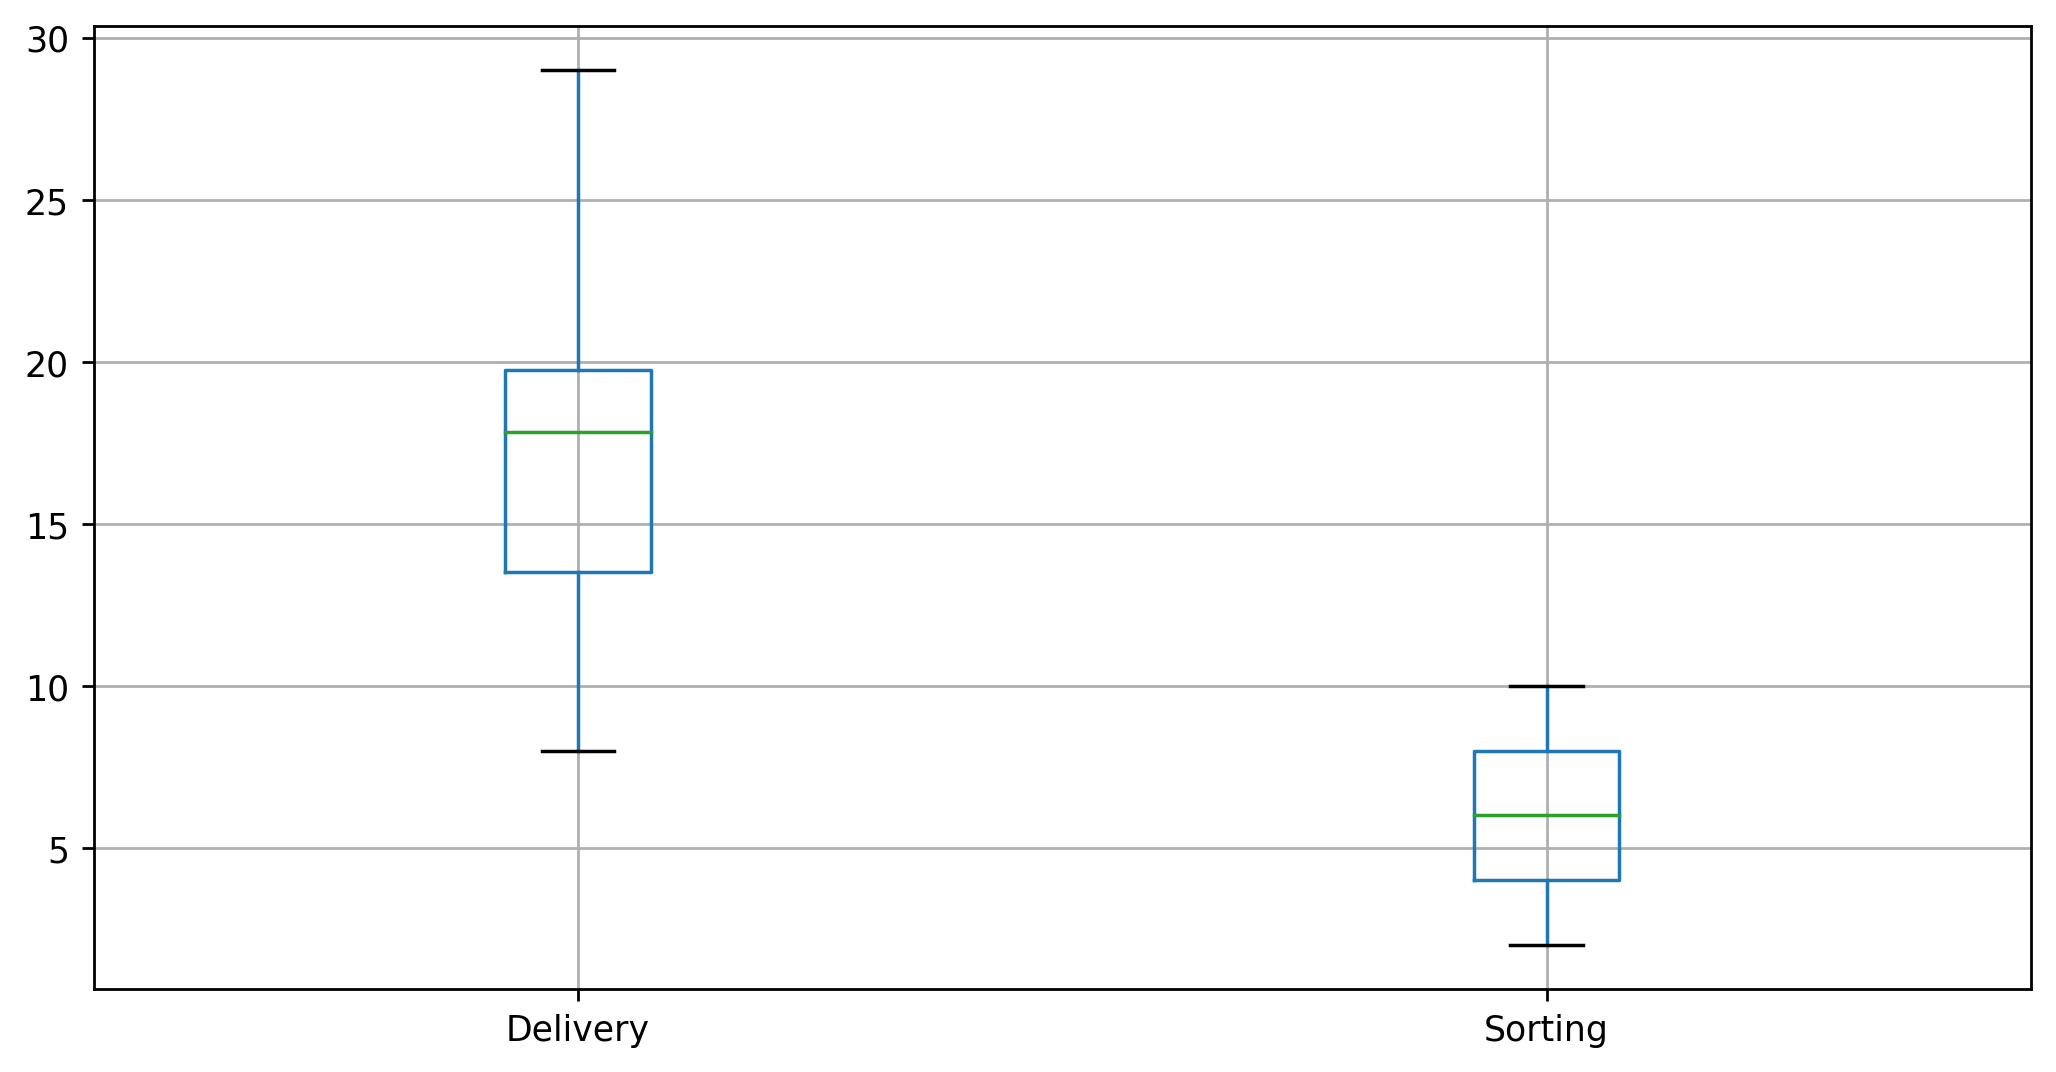

In [14]:
# Checking for outliers in the data
df.boxplot()

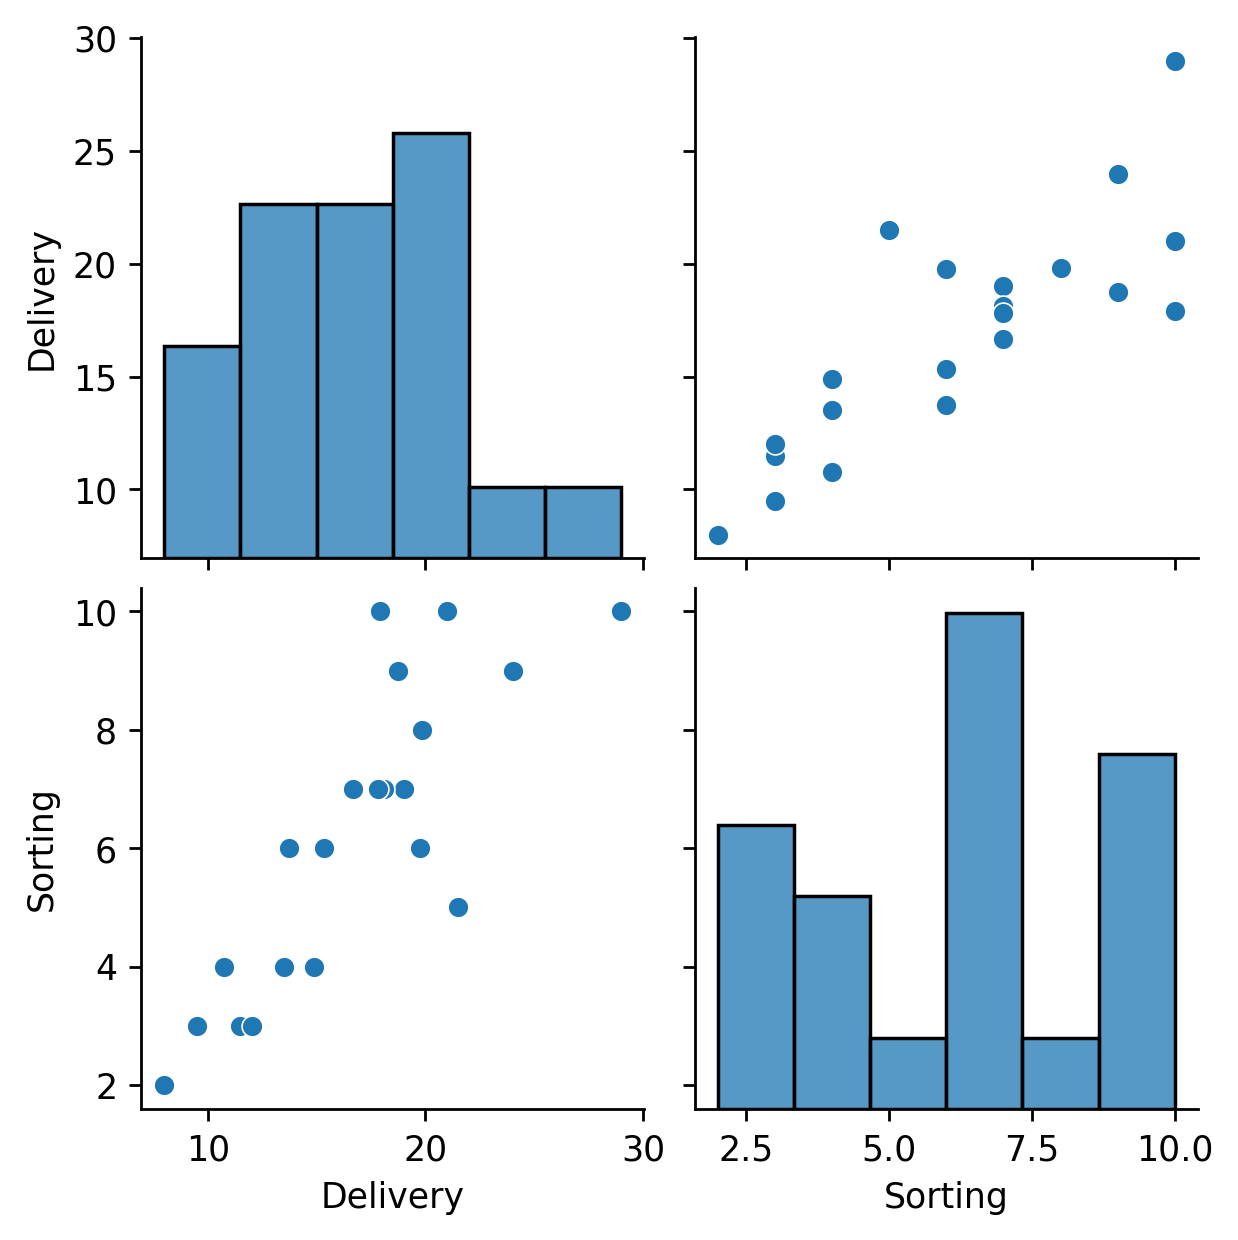

In [15]:
sns.pairplot(df)

<AxesSubplot:xlabel='Delivery', ylabel='Density'>

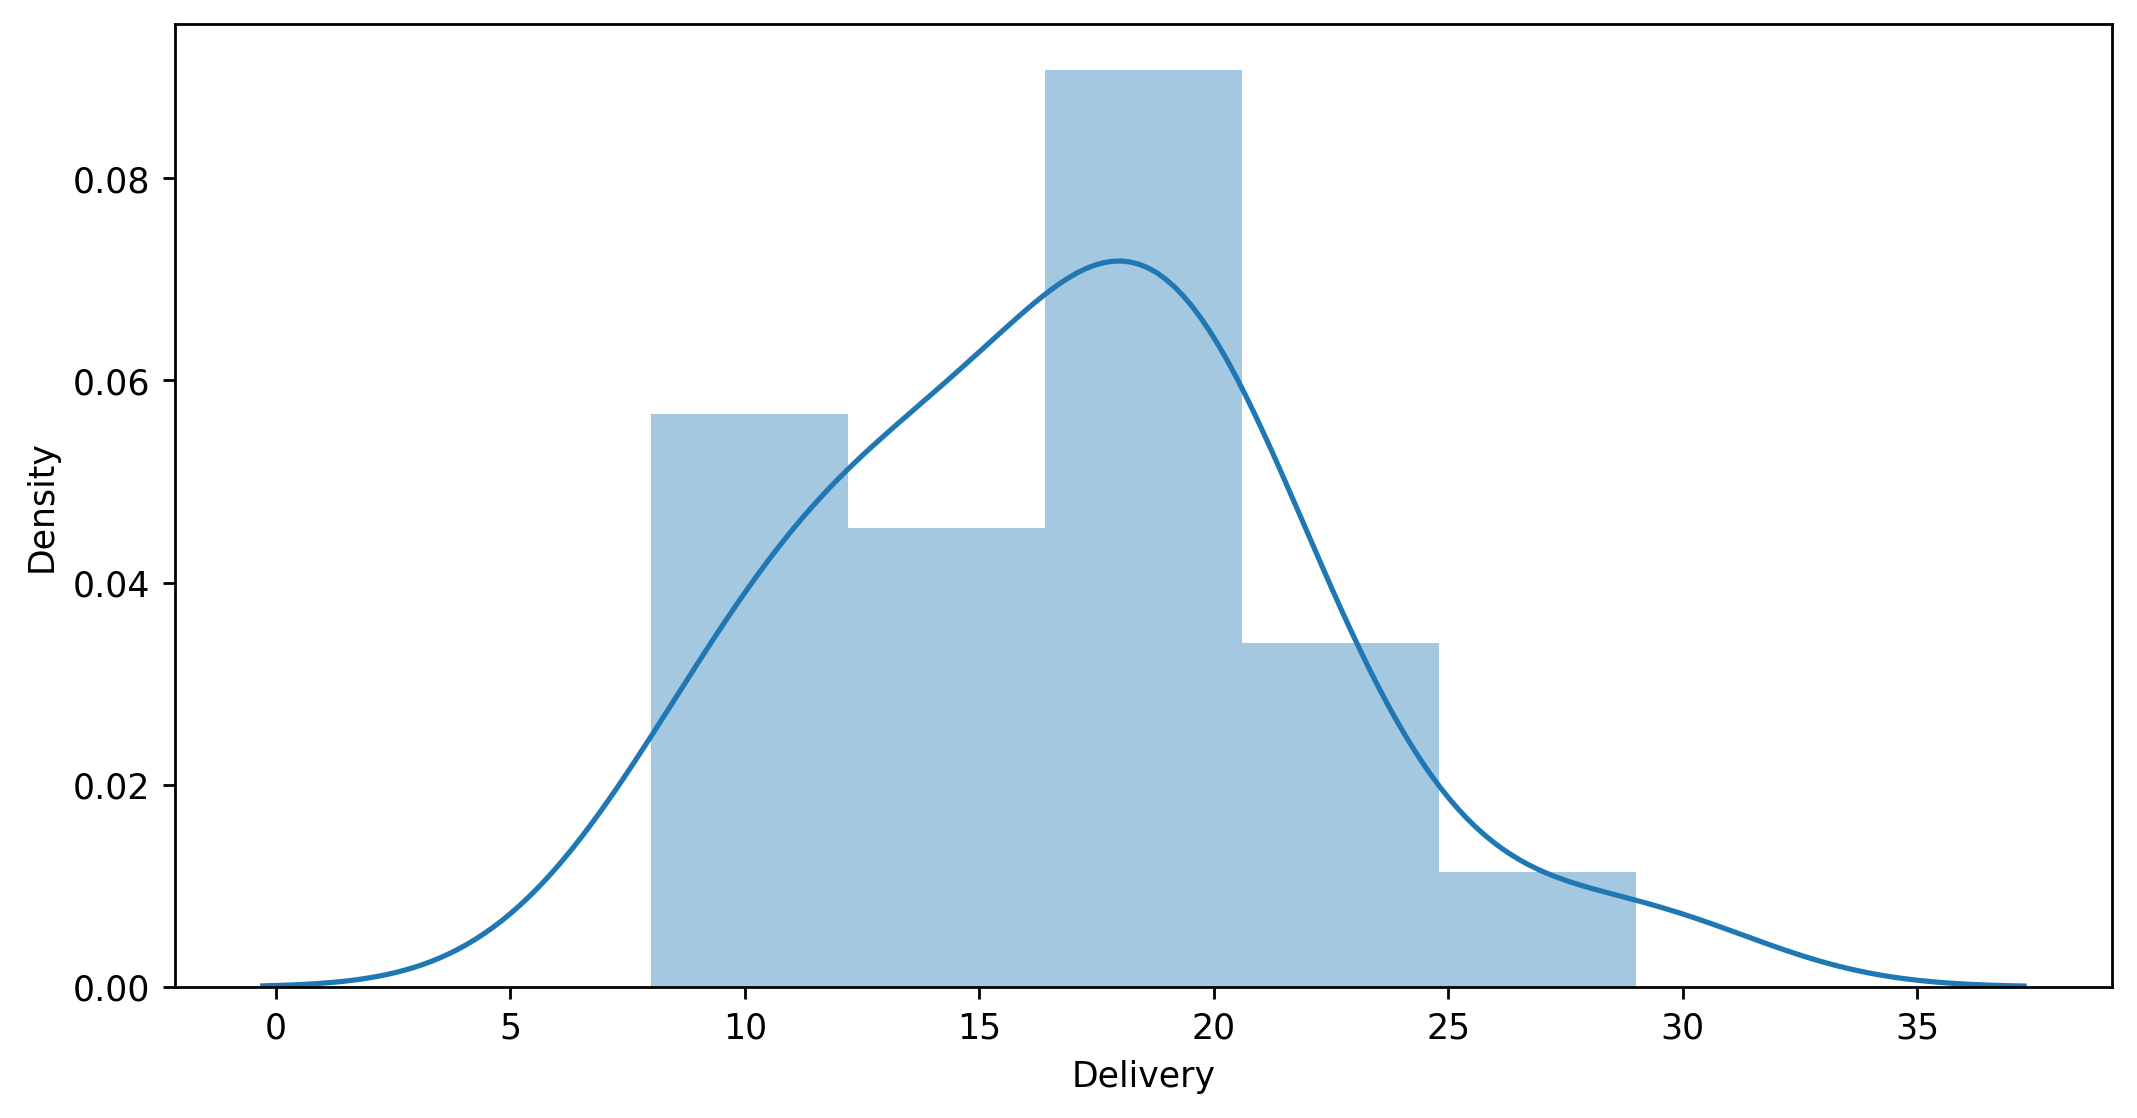

In [16]:
# Plotting distplot and understanding the skewness
sns.distplot(df['Delivery'])

<AxesSubplot:xlabel='Sorting', ylabel='Density'>

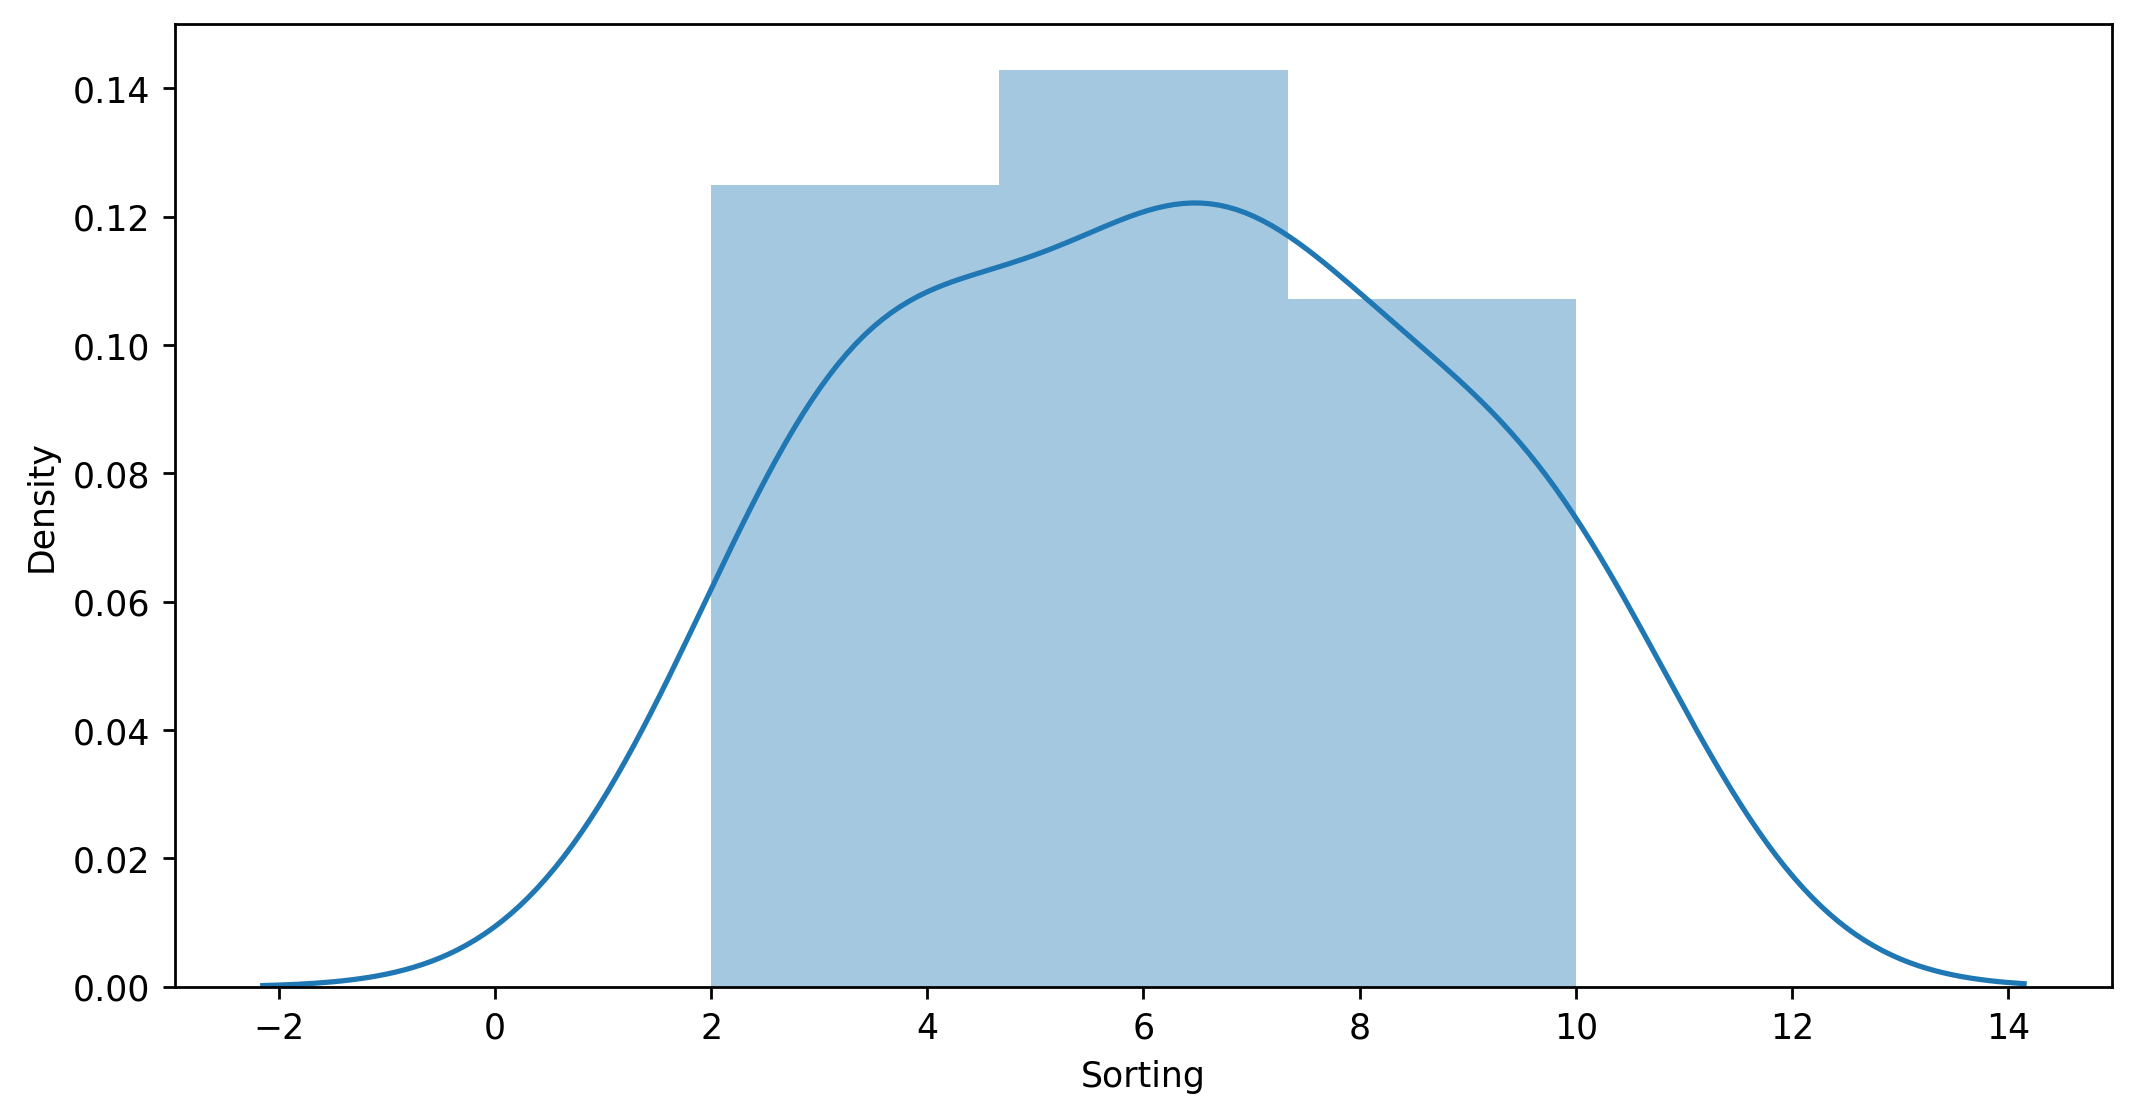

In [17]:
sns.distplot(df['Sorting'])

In [18]:
# Checking skewness values
df['Delivery'].skew()

0.3523900822831107

In [19]:
df['Sorting'].skew()

0.047115474210530174

In [20]:
df.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


<AxesSubplot:>

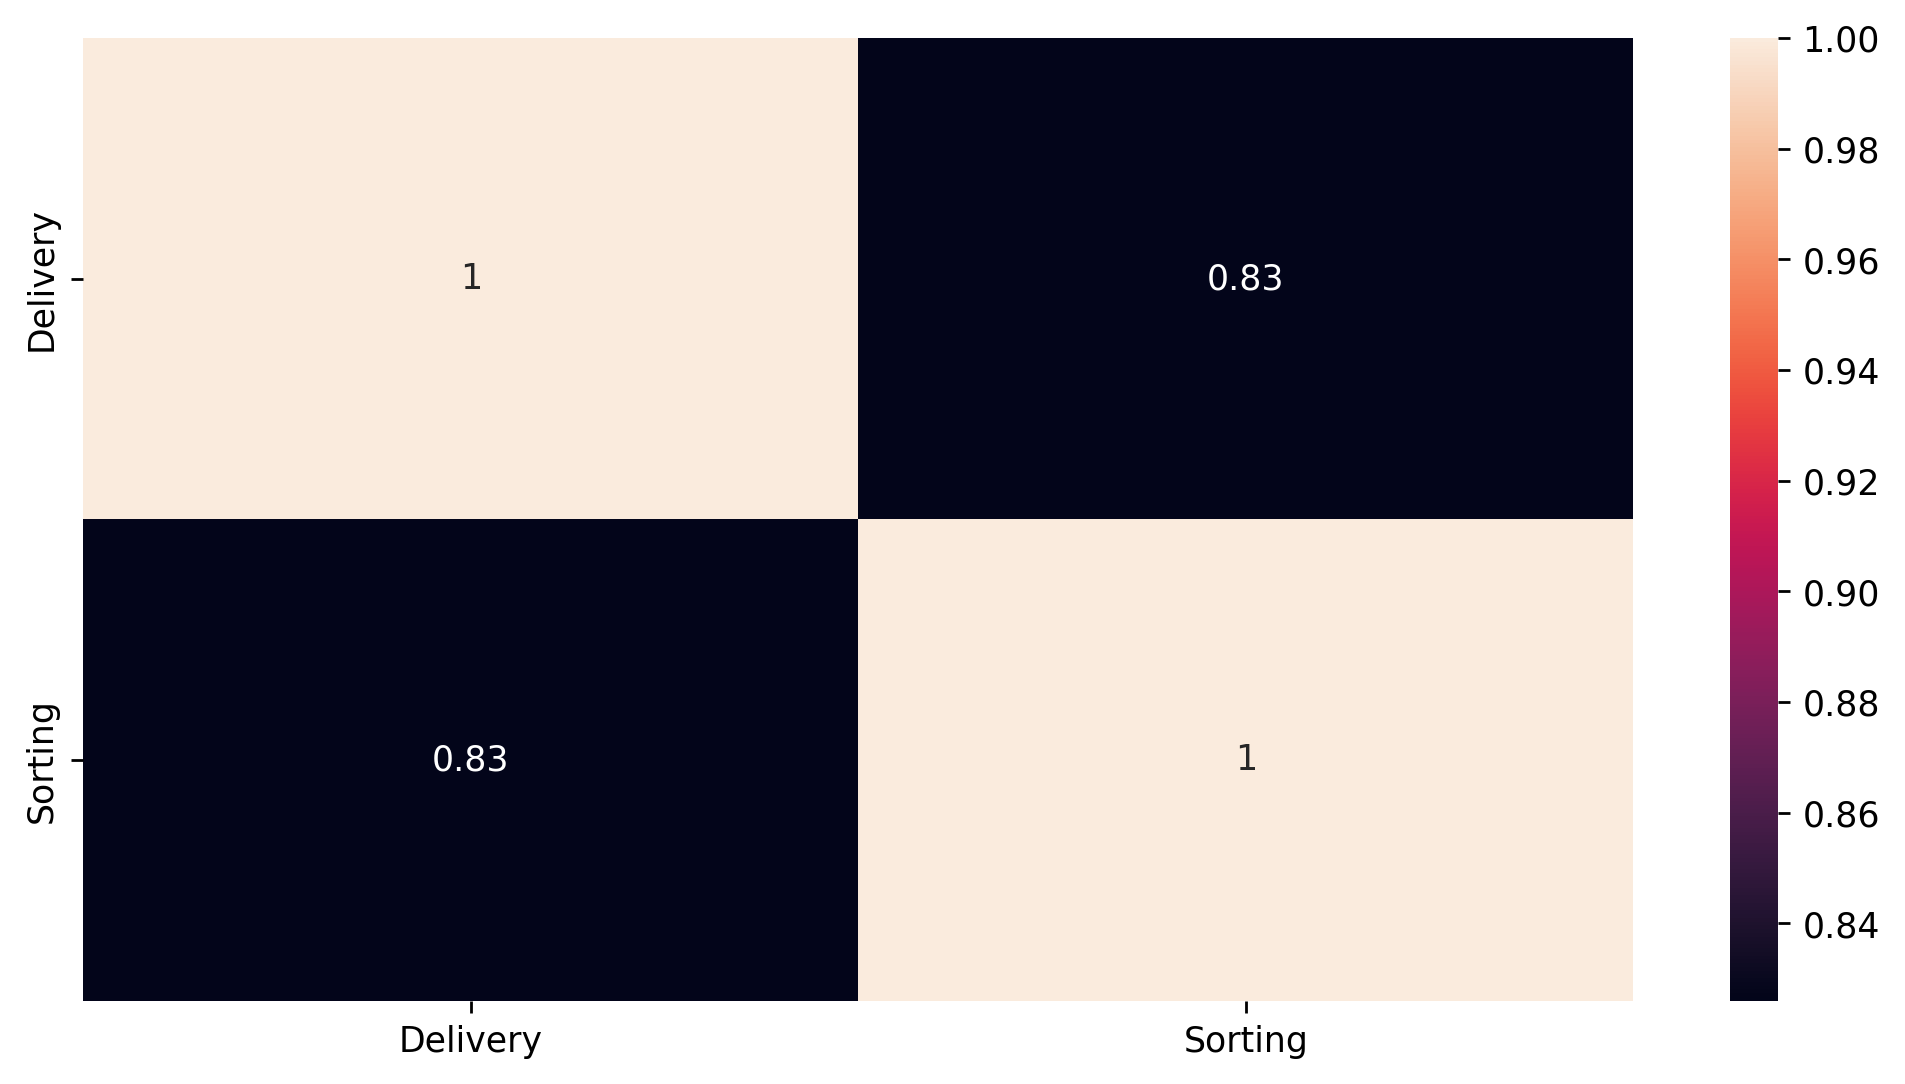

In [21]:
#Plotting heatmap for correlation values
sns.heatmap(df.corr(),annot=True)

In [22]:
# Everything seems good so we move to model building

Model Building of Linear Regression Model

In [24]:
model = smf.ols('Delivery~Sorting', data=df).fit()

In [25]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [26]:
# Checking for a random Sorting Time Value
x = 8
y = 1.649020 * x + 6.582734
y

19.774894

In [27]:
# Checking for rsquared value to check Accuracy of the Model
model.rsquared

0.6822714748417231

Trying to increase the accuracy of the Model using Data Transformation Techniques

Data Transformation using log

In [28]:
df['log_Delivery'] = np.log(df['Delivery'])
df['log_Sorting'] = np.log(df['Sorting'])

In [29]:
df.head()

,Delivery,Sorting,log_Delivery,log_Sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


<AxesSubplot:xlabel='log_Sorting', ylabel='Density'>

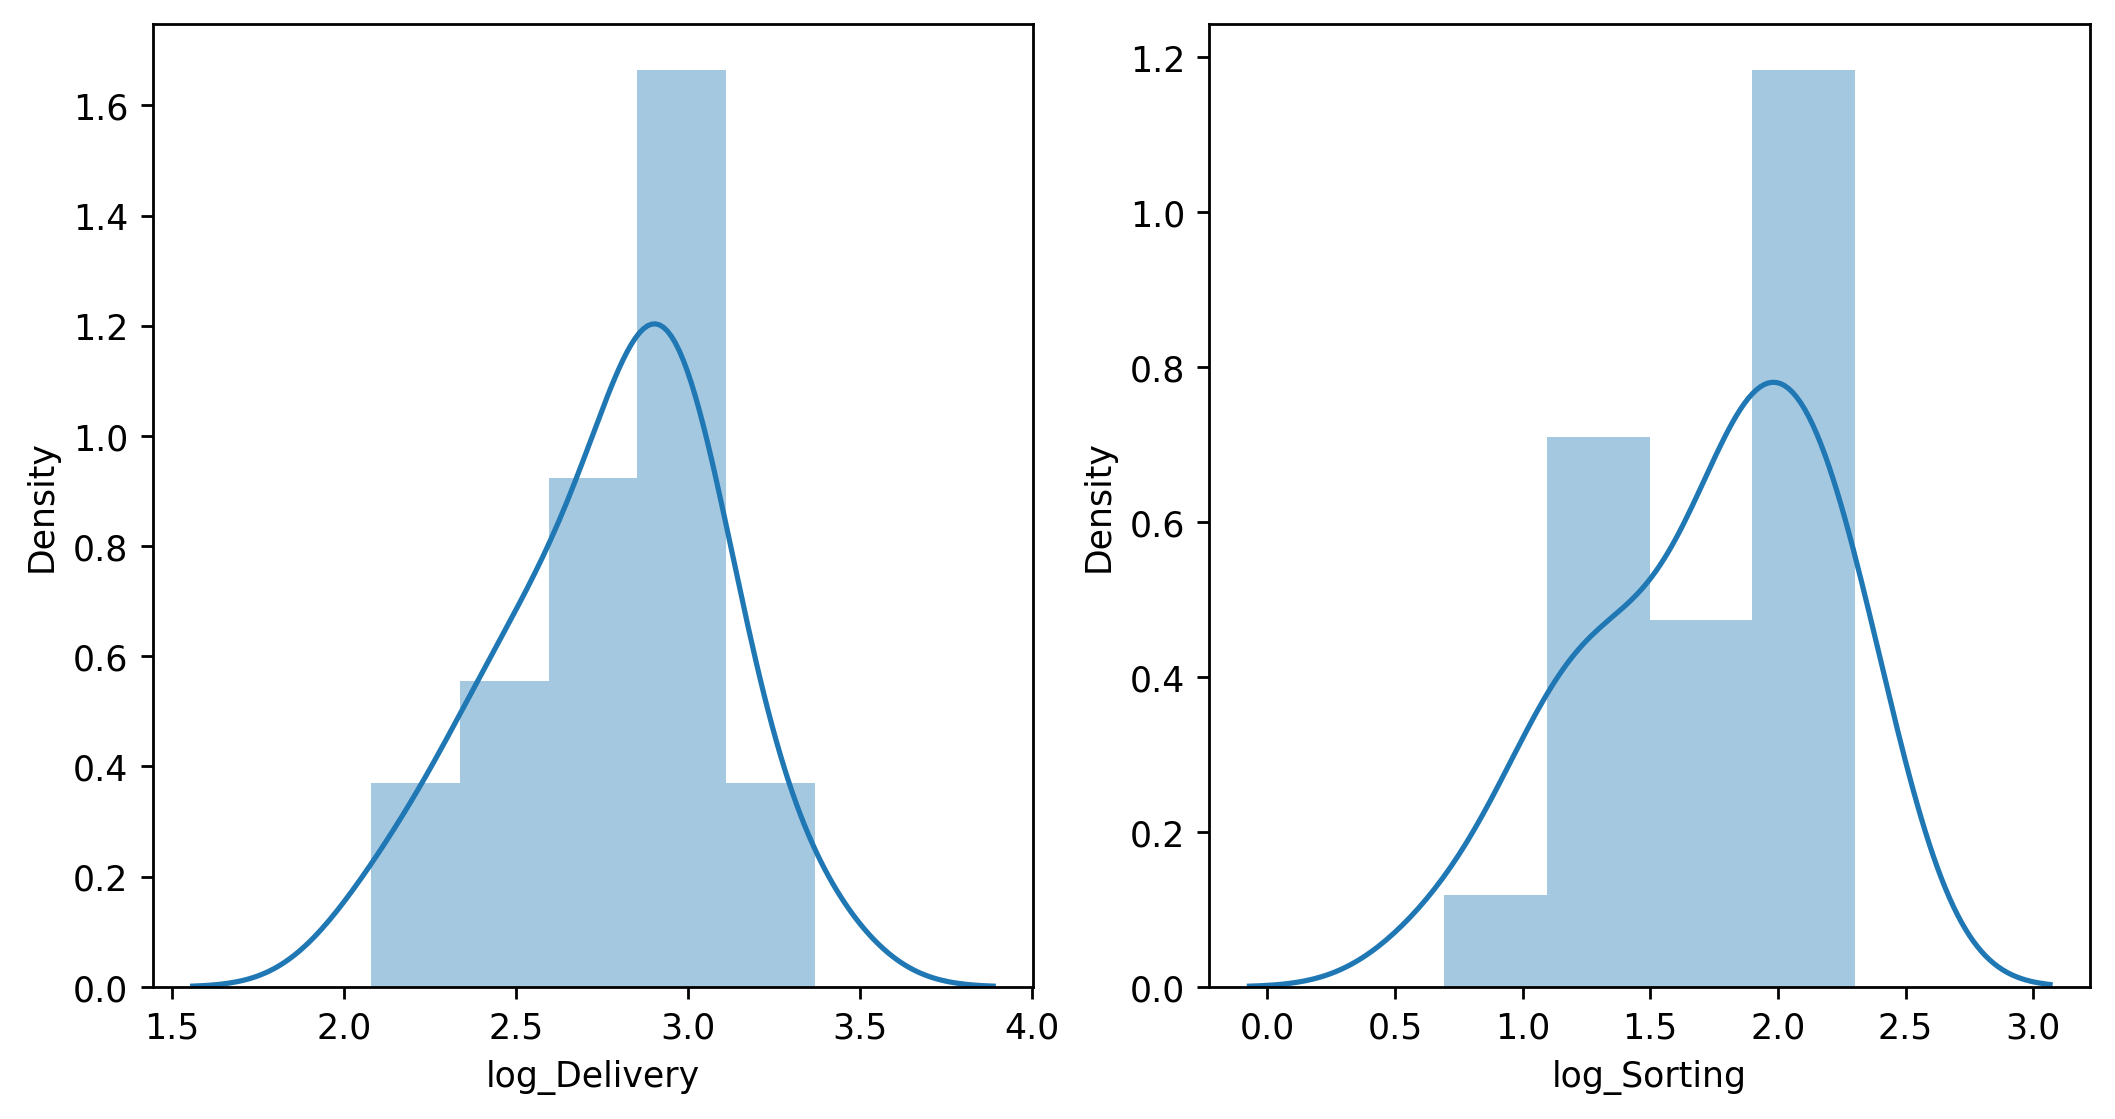

In [30]:
plt.subplot(1,2,1)
sns.distplot(df['log_Delivery'])
plt.subplot(1,2,2)
sns.distplot(df['log_Sorting'])

In [31]:
df['log_Delivery'].skew()

-0.4512901148522999

In [32]:
df['log_Sorting'].skew()

-0.6052357185134765

In [33]:
model1 = smf.ols('log_Delivery~log_Sorting', data=df).fit()

In [34]:
model1.params

Intercept      1.741987
log_Sorting    0.597522
dtype: float64

In [35]:
model1.rsquared

0.77216134926874

# rsquared have increased by 10%.
# Therefore, We finalize this model of log Transformation
# model1 is our Final Model

In [36]:
newdf = pd.DataFrame({
    'Sorting' : [2,5,6.2,8.9,7,4]
})

In [37]:
newdf

,Sorting
0,2.0
1,5.0
2,6.2
3,8.9
4,7.0
5,4.0


In [38]:
df

,Delivery,Sorting,log_Delivery,log_Sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


In [39]:
model.predict(newdf)

0     9.880774
1    14.827833
2    16.806657
3    21.259011
4    18.125873
5    13.178814
dtype: float64

We got our predictions for the sample values. 
We can verify the values with the actual dataset